In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Đọc dữ liệu từ tệp thứ nhất
df = pd.read_csv('WHR2005-2023.csv')

Asia = df[df['Regional Indicator'].isin(['Southeast Asia', 'East Asia'])]

Asia = Asia.round(4)
Asia.to_csv('Asia.csv', index = False)


In [10]:
Asia_float = Asia.select_dtypes(include=['float64'])
Asia_float


Asia = Asia.loc[:, ~Asia.columns.str.contains('^Unnamed')]

# Chuyển đổi kiểu dữ liệu của cột 'Perceptions Of Corruption' thành float64
Asia['Perceptions Of Corruption'] = pd.to_numeric(Asia['Perceptions Of Corruption'], errors='coerce')

# Hiển thị thông tin của DataFrame sau khi xoá cột và chuyển đổi kiểu dữ liệu
print(Asia.info())


<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 295 to 2183
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      246 non-null    object 
 1   Regional Indicator                246 non-null    object 
 2   Year                              246 non-null    int64  
 3   Life Ladder                       246 non-null    float64
 4   Logged GDP Per Capita             246 non-null    float64
 5   Social Support                    246 non-null    float64
 6   Healthy Life Expectancy At Birth  246 non-null    float64
 7   Freedom To Make Life Choices      246 non-null    float64
 8   Generosity                        246 non-null    float64
 9   Perceptions Of Corruption         219 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 21.1+ KB
None


In [4]:
countries = Asia['Country Name'].unique()
countries

array(['Cambodia', 'China', 'Hong Kong S.A.R. of China', 'Indonesia',
       'Japan', 'Laos', 'Malaysia', 'Mongolia', 'Myanmar', 'Philippines',
       'Singapore', 'South Korea', 'Taiwan Province of China', 'Thailand',
       'Vietnam'], dtype=object)

In [12]:
# Lặp qua từng quốc gia và điền giá trị trung bình cho các ô null
for country in countries:
    country_data = Asia[Asia['Country Name'] == country]
    for column in country_data.columns:
        if country_data[column].dtype == 'float64':
            Asia.loc[Asia['Country Name'] == country, column] = country_data[column].fillna(country_data[column].mean())

Asia.to_csv('Asia1.csv', index = False)

In [13]:
asia_data = pd.read_csv('Asia1.csv')

# Tách dữ liệu của Việt Nam
vietnam_data = asia_data[asia_data['Country Name'] == 'Vietnam']

vietnam_data.to_csv('Vietnam.csv', index=False)

In [14]:
vietnam_data

,Country Name,Regional Indicator,Year,Life Ladder,Logged GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
228,Vietnam,Southeast Asia,2006,5.2937,8.5538,0.887700,64.180,0.8858,-0.003500,0.778491
229,Vietnam,Southeast Asia,2007,5.4217,8.6131,0.856000,64.260,0.9178,0.071100,0.753934
230,Vietnam,Southeast Asia,2008,5.4804,8.6583,0.804600,64.340,0.8886,0.182500,0.789238
231,Vietnam,Southeast Asia,2009,5.3043,8.7006,0.815000,64.420,0.8341,-0.080000,0.837870
232,Vietnam,Southeast Asia,2010,5.2958,8.7522,0.786600,64.500,0.8315,-0.023900,0.742637
233,Vietnam,Southeast Asia,2011,5.7673,8.8037,0.897700,64.580,0.8184,0.086800,0.742162
234,Vietnam,Southeast Asia,2012,5.5346,8.8465,0.775000,64.660,0.8561,-0.128700,0.814885
235,Vietnam,Southeast Asia,2013,5.0227,8.8898,0.759500,64.740,0.9196,-0.045600,0.771246
236,Vietnam,Southeast Asia,2014,5.0849,8.9414,0.792200,64.820,0.8976,-0.018800,0.778491
237,Vietnam,Southeast Asia,2015,5.0763,8.9985,0.848700,64.900,0.8976,0.066400,0.778491


In [19]:
vietnam_data = pd.read_csv('Vietnam.csv')
vietnam_data

,Country Name,Regional Indicator,Year,Life Ladder,Logged GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
0,Vietnam,Southeast Asia,2006,5.2937,8.5538,0.887700,64.180,0.8858,-0.003500,0.778491
1,Vietnam,Southeast Asia,2007,5.4217,8.6131,0.856000,64.260,0.9178,0.071100,0.753934
2,Vietnam,Southeast Asia,2008,5.4804,8.6583,0.804600,64.340,0.8886,0.182500,0.789238
3,Vietnam,Southeast Asia,2009,5.3043,8.7006,0.815000,64.420,0.8341,-0.080000,0.837870
4,Vietnam,Southeast Asia,2010,5.2958,8.7522,0.786600,64.500,0.8315,-0.023900,0.742637
5,Vietnam,Southeast Asia,2011,5.7673,8.8037,0.897700,64.580,0.8184,0.086800,0.742162
6,Vietnam,Southeast Asia,2012,5.5346,8.8465,0.775000,64.660,0.8561,-0.128700,0.814885
7,Vietnam,Southeast Asia,2013,5.0227,8.8898,0.759500,64.740,0.9196,-0.045600,0.771246
8,Vietnam,Southeast Asia,2014,5.0849,8.9414,0.792200,64.820,0.8976,-0.018800,0.778491
9,Vietnam,Southeast Asia,2015,5.0763,8.9985,0.848700,64.900,0.8976,0.066400,0.778491


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Đọc dữ liệu từ file CSV
vietnam_data = pd.read_csv('Vietnam.csv')

# Chọn các cột cần thiết
selected_columns = ['Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Life Ladder', 'Year']
data_selected = vietnam_data[selected_columns]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data = train_test_split(data_selected, test_size=0.2, random_state=42)

# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
X_train = train_data[selected_columns[:-2]]  # Chọn tất cả các cột ngoại trừ 'Life Ladder' và 'Year'
y_train = train_data['Life Ladder']
model.fit(X_train, y_train)

# Kiểm tra mô hình trên tập kiểm tra
X_test = test_data[selected_columns[:-2]]  # Chọn tất cả các cột ngoại trừ 'Life Ladder' và 'Year'
y_test = test_data['Life Ladder']
predictions = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

# Dự đoán cho năm 2024 sử dụng ARIMA cho từng biến độc lập
independent_variables = ['Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']
forecasted_values = []  # Define an empty list to store forecasted values

for variable in independent_variables:
    # Tạo mô hình ARIMA với chỉ mục là 'Year'
    model_arima = sm.tsa.ARIMA(train_data[variable], order=(0, 0, 1))  # Thay p, d, q bằng các giá trị thích hợp
    results = model_arima.fit()

    # Dự đoán giá trị cho năm 2024
    forecast = results.get_forecast(steps=1)
    forecasted_value = forecast.predicted_mean.iloc[0]
    
    # Append the forecasted value to the list
    forecasted_values.append(forecasted_value)
    
    # In kết quả
    print(f'Predicted value for {variable} in 2024: {forecasted_value}')

# Sử dụng mô hình Linear Regression để dự đoán Life Ladder cho năm 2024
# Bạn có thể thêm cột 'Year' vào dự đoán để sử dụng như chỉ mục cho mô hình ARIMA
predicted_life_ladder_2024 = model.predict([forecasted_values])

print(f'Predicted Life Ladder for 2024: {predicted_life_ladder_2024[0]}')

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")
# Đọc dữ liệu từ file CSV
vietnam_data = pd.read_csv('Vietnam.csv')

# Chọn các cột cần thiết
selected_columns = ['Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Life Ladder', 'Year']
data_selected = vietnam_data[selected_columns]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data = train_test_split(data_selected, test_size=0.2, random_state=42)

# Tạo mô hình Linear Regression
model_lr = LinearRegression()

# Huấn luyện mô hình Linear Regression
X_train_lr = train_data[selected_columns[:-2]]  # Chọn tất cả các cột ngoại trừ 'Life Ladder' và 'Year'
y_train_lr = train_data['Life Ladder']
model_lr.fit(X_train_lr, y_train_lr)

# Kiểm tra mô hình Linear Regression trên tập kiểm tra
X_test_lr = test_data[selected_columns[:-2]]  # Chọn tất cả các cột ngoại trừ 'Life Ladder' và 'Year'
y_test_lr = test_data['Life Ladder']
predictions_lr = model_lr.predict(X_test_lr)

# Đánh giá mô hình Linear Regression
mae_lr = mean_absolute_error(y_test_lr, predictions_lr)
mse_lr = mean_squared_error(y_test_lr, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_lr, predictions_lr)

print("Linear Regression Metrics:")
print(f'Mean Absolute Error (MAE): {mae_lr:.4f}')
print(f'Mean Squared Error (MSE): {mse_lr:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.4f}')
print(f'R-squared (R2): {r2_lr:.4f}')

# Dự đoán cho năm 2024 sử dụng SARIMAX cho từng biến độc lập
independent_variables = ['Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']
forecasted_values_sarimax = {}  # Dictionary to store forecasted values for each variable

for variable in independent_variables:
    # Tạo mô hình SARIMAX với chỉ mục là 'Year'
    model_sarimax = SARIMAX(train_data[variable], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=True, enforce_invertibility=False)
    results_sarimax = model_sarimax.fit()

    # Dự đoán giá trị cho năm 2024
    forecast_sarimax = results_sarimax.get_forecast(steps=1)
    forecasted_value_sarimax = forecast_sarimax.predicted_mean.iloc[0]
    
    # Lưu giá trị dự đoán vào từ điển
    forecasted_values_sarimax[variable] = forecasted_value_sarimax
    

    # In kết quả
    print(f'Predicted value for {variable} in 2024 using SARIMAX: {forecasted_value_sarimax}')

# Sử dụng mô hình Linear Regression để dự đoán Life Ladder cho năm 2024 sử dụng giá trị từ SARIMAX
X_test_lr_2024 = np.array(list(forecasted_values_sarimax.values())).reshape(1, -1)
predicted_life_ladder_2024_sarimax = model_lr.predict(X_test_lr_2024)

print(f'Predicted Life Ladder for 2024: {predicted_life_ladder_2024_sarimax[0]}')


Linear Regression Metrics:
Mean Absolute Error (MAE): 0.3259
Mean Squared Error (MSE): 0.1392
Root Mean Squared Error (RMSE): 0.3731
R-squared (R2): -1.2661
Predicted value for Logged GDP Per Capita in 2024 using SARIMAX: 9.613448937933946
Predicted value for Social Support in 2024 using SARIMAX: 0.8037431287705998
Predicted value for Healthy Life Expectancy At Birth in 2024 using SARIMAX: 65.99935273843244
Predicted value for Freedom To Make Life Choices in 2024 using SARIMAX: 1.0685849128753684
Predicted value for Generosity in 2024 using SARIMAX: -0.1789580805426504
Predicted value for Perceptions Of Corruption in 2024 using SARIMAX: 0.6908406075567007
Predicted Life Ladder for 2024: 5.770843635193444


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Tạo mô hình Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
forest_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
forest_predictions = forest_model.predict(X_test)

# Đánh giá mô hình Random Forest
mae_forest = mean_absolute_error(y_test, forest_predictions)
mse_forest = mean_squared_error(y_test, forest_predictions)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, forest_predictions)

print("Random Forest Regressor Metrics:")
print(f'Mean Absolute Error (MAE): {mae_forest:.4f}')
print(f'Mean Squared Error (MSE): {mse_forest:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_forest:.4f}')
print(f'R-squared (R2): {r2_forest:.4f}')

# Dự đoán Life Ladder cho năm 2024
predicted_life_ladder_2024_sarimax = forest_model.predict(X_test_lr_2024)

print(f'Predicted Life Ladder for 2024 using Random Forest Regressor: {predicted_life_ladder_2024_sarimax[0]}')


Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 0.0571
Mean Squared Error (MSE): 0.0057
Root Mean Squared Error (RMSE): 0.0758
R-squared (R2): 0.9064
Predicted Life Ladder for 2024 using Random Forest Regressor: 5.885823999999996


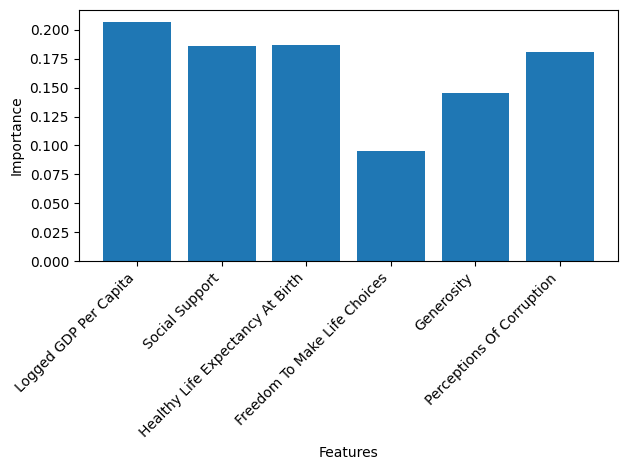

In [ ]:
import matplotlib.pyplot as plt

# Lấy tính chất quan trọng của biến từ mô hình
feature_importances = forest_model.feature_importances_

# Hiển thị biểu đồ cột về tính quan trọng của biến
plt.bar(range(len(feature_importances)), feature_importances, tick_label=list(X_train.columns))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Xoay tên đặc trưng
plt.tight_layout()
plt.show()


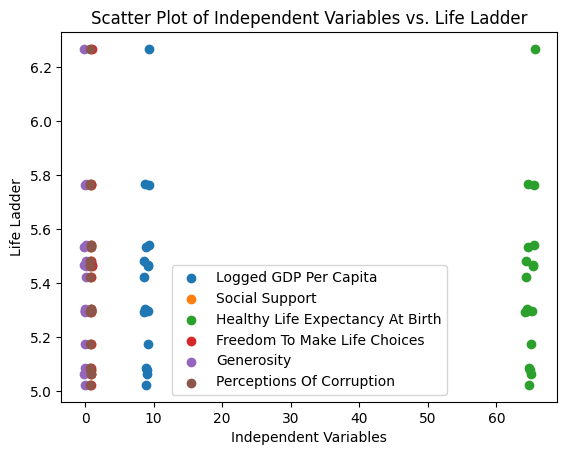

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Chọn các biến độc lập và biến phụ thuộc
independent_variables = ['Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']
dependent_variable = 'Life Ladder'

# Vẽ biểu đồ Scatter Plot cho mỗi biến độc lập đối với biến phụ thuộc
for variable in independent_variables:
    plt.scatter(vietnam_data[variable], vietnam_data[dependent_variable], label=variable)

# Thiết lập các thông số của biểu đồ
plt.title(f'Scatter Plot of Independent Variables vs. {dependent_variable}')
plt.xlabel('Independent Variables')
plt.ylabel(dependent_variable)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

Asia = pd.read_csv('Asia.csv')


# Hoặc sử dụng điều kiện boolean
data_2021 = Asia[Asia['Year'] == 2021]


# Đặt 'Country Name' làm chỉ mục
data_2021 = data_2021.set_index('Country Name')

# Tạo DataFrame mới từ cột 'Life Ladder' để vẽ bản đồ
temp = pd.DataFrame(data_2021['Life Ladder']).reset_index()

temp
# Sử dụng Plotly Express để vẽ bản đồ
fig = px.choropleth(
    temp,
    locations='Country Name',
    locationmode='country names',
    color='Life Ladder',
    color_continuous_scale='Viridis',  # Chọn một bảng màu tương ứng
    title='World map - Life Ladder',
    labels={'Life Ladder': 'Lifer Ladder'},
)

# Cập nhật cài đặt của biểu đồ
fig.update_layout(
    showlegend=False,
    paper_bgcolor='rgb(248, 248, 255)',
    geo_bgcolor='rgb(248, 248, 255)',
    geo_showframe=False,
    title_font_size=22,
)

# Hiển thị biểu đồ
fig.show()
